data: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [177]:
df=pd.read_csv('bank_additional_full_clean_scaled.csv')

In [179]:
X = df.iloc[:, 0:-1]

In [180]:
X.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.642226,0,1,1,0,0,0,0,5,1,0.005792,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641
1,-0.196449,1,1,4,0,1,0,0,5,1,-0.127941,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641


In [182]:
y.head(2)

0    0
1    0
Name: y, dtype: int64

In [183]:
X_sc = df.iloc[:, 0:-1]

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_sc_train, X_sc_temp, y_sc_train, y_temp = train_test_split(X_sc, y, test_size=0.4, random_state=101)

In [186]:
X_sc_cv, X_sc_test, y_sc_cv, y_sc_test = train_test_split(X_sc_temp, y_temp, test_size=0.5, random_state=101)

In [187]:
from sklearn.svm import SVC

In [188]:
from sklearn.metrics import classification_report

In [189]:
clf_svc1 = SVC(C=1.0).fit(X_sc_train, y_sc_train)
clf_svc2 = SVC(C=3.0).fit(X_sc_train, y_sc_train)
clf_svc3 = SVC(C=10).fit(X_sc_train, y_sc_train)

In [190]:
clf_svc4 = SVC(C=30).fit(X_sc_train, y_sc_train)

In [191]:
clf_svc5 = SVC(C=100).fit(X_sc_train, y_sc_train)

In [192]:
clf_svc6 = SVC(C=300).fit(X_sc_train, y_sc_train)

In [193]:
clf_svc7 = SVC(C=1000).fit(X_sc_train, y_sc_train)

In [194]:
clf_svc8 = SVC(C=3000).fit(X_sc_train, y_sc_train)

In [195]:
svc_lst = [clf_svc1, clf_svc2, clf_svc3, clf_svc4, clf_svc5, clf_svc6, clf_svc7, clf_svc8]
svc_c = [1, 3, 10, 30, 100, 300, 1000, 3000]

In [196]:
for i in range(len(svc_lst)):
    print("svc model, C=", svc_c[i], "\nClassification report on trainng data\n", 
          classification_report(y_sc_train, svc_lst[i].predict(X_sc_train)))
    print("Classification report on cross-validation data\n", 
          classification_report(y_sc_cv, svc_lst[i].predict(X_sc_cv)))

svc model, C= 1 
Classification report on trainng data
              precision    recall  f1-score   support

          0       0.92      0.98      0.95     15941
          1       0.77      0.44      0.56      2351

avg / total       0.90      0.91      0.90     18292

Classification report on cross-validation data
              precision    recall  f1-score   support

          0       0.92      0.97      0.94      5362
          1       0.65      0.39      0.48       736

avg / total       0.89      0.90      0.89      6098

svc model, C= 3 
Classification report on trainng data
              precision    recall  f1-score   support

          0       0.94      0.98      0.96     15941
          1       0.82      0.56      0.67      2351

avg / total       0.92      0.93      0.92     18292

Classification report on cross-validation data
              precision    recall  f1-score   support

          0       0.93      0.97      0.95      5362
          1       0.64      0.44      0.

#### clf_svc2 (C=3) and clf_svc3 (C=10) had the best f1-scores on the cross-validation data.

In [198]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [199]:
for i in range(len(svc_lst)):
    print("\nsvc model",i+1, ", C =", svc_c[i], "\n roc_auc_score on trainng data\n", 
          roc_auc_score(y_sc_train, svc_lst[i].predict(X_sc_train)))
    print("roc_auc_score on cross-validation data\n", 
          roc_auc_score(y_sc_cv, svc_lst[i].predict(X_sc_cv)))


svc model 1 , C = 1 
 roc_auc_score on trainng data
 0.712860636058
roc_auc_score on cross-validation data
 0.678387971717

svc model 2 , C = 3 
 roc_auc_score on trainng data
 0.770185083548
roc_auc_score on cross-validation data
 0.704096510468

svc model 3 , C = 10 
 roc_auc_score on trainng data
 0.819399553185
roc_auc_score on cross-validation data
 0.714166619367

svc model 4 , C = 30 
 roc_auc_score on trainng data
 0.866650980723
roc_auc_score on cross-validation data
 0.706080834536

svc model 5 , C = 100 
 roc_auc_score on trainng data
 0.912093139283
roc_auc_score on cross-validation data
 0.717909240549

svc model 6 , C = 300 
 roc_auc_score on trainng data
 0.946636831355
roc_auc_score on cross-validation data
 0.716776825244

svc model 7 , C = 1000 
 roc_auc_score on trainng data
 0.974137751846
roc_auc_score on cross-validation data
 0.706812888199

svc model 8 , C = 3000 
 roc_auc_score on trainng data
 0.988100887548
roc_auc_score on cross-validation data
 0.713992538

### clf_svc5 (C=100) had the best roc_auc_score on the cross-validation data. 

In [200]:
from sklearn.ensemble import RandomForestClassifier

In [201]:
clf_rf1 = RandomForestClassifier(n_estimators=10).fit(X_sc_train, y_sc_train)

In [202]:
clf_rf2 = RandomForestClassifier(n_estimators=20).fit(X_sc_train, y_sc_train)

In [203]:
clf_rf3 = RandomForestClassifier(n_estimators=30).fit(X_sc_train, y_sc_train)

In [204]:
clf_rf4 = RandomForestClassifier(n_estimators=10, min_samples_leaf=3).fit(X_sc_train, y_sc_train)

In [205]:
clf_rf5 = RandomForestClassifier(n_estimators=10, min_samples_leaf=6).fit(X_sc_train, y_sc_train)

In [206]:
clf_rf6 = RandomForestClassifier(n_estimators=20, min_samples_leaf=3).fit(X_sc_train, y_sc_train)

In [207]:
clf_rf7 = RandomForestClassifier(n_estimators=20, min_samples_leaf=6).fit(X_sc_train, y_sc_train)

In [208]:
clf_rf8 = RandomForestClassifier(n_estimators=30, min_samples_leaf=3).fit(X_sc_train, y_sc_train)

In [209]:
clf_rf9 = RandomForestClassifier(n_estimators=30, min_samples_leaf=6).fit(X_sc_train, y_sc_train)

In [210]:
rf_lst = [clf_rf1, clf_rf2, clf_rf3, clf_rf4, clf_rf5, clf_rf6, clf_rf7, clf_rf8, clf_rf9]
n_est_lst = [10, 20, 30, 10, 10, 20, 20, 30, 30]
min_samp_lst = [1, 1, 1, 3, 6, 3, 6, 3, 6]

In [211]:
for i in range(len(rf_lst)):
    print("Random Forest model, n_estimators=", n_est_lst[i], "min_samples_leaf=", min_samp_lst[i],
          "\nClassification report on trainng data\n", 
          classification_report(y_sc_train, rf_lst[i].predict(X_sc_train)))
    print("Classification report on cross-validation data\n", 
          classification_report(y_sc_cv, rf_lst[i].predict(X_sc_cv)))

Random Forest model, n_estimators= 10 min_samples_leaf= 1 
Classification report on trainng data
              precision    recall  f1-score   support

          0       0.99      1.00      1.00     15941
          1       0.99      0.95      0.97      2351

avg / total       0.99      0.99      0.99     18292

Classification report on cross-validation data
              precision    recall  f1-score   support

          0       0.93      0.96      0.94      5362
          1       0.60      0.45      0.52       736

avg / total       0.89      0.90      0.89      6098

Random Forest model, n_estimators= 20 min_samples_leaf= 1 
Classification report on trainng data
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     15941
          1       1.00      0.98      0.99      2351

avg / total       1.00      1.00      1.00     18292

Classification report on cross-validation data
              precision    recall  f1-score   support

         

#### clf_rf5 and clf_rf6 had the best f1-scores.

In [213]:
for i in range(len(rf_lst)):
    print("\nRandom Forest model",i+1, "---nn_estimators=", n_est_lst[i], ", min_samples_leaf=", min_samp_lst[i],
          "\nroc_auc_score on trainng data\n", roc_auc_score(y_sc_train, rf_lst[i].predict(X_sc_train)))
    print("roc_auc_score on cross-validation data\n", roc_auc_score(y_sc_cv, rf_lst[i].predict(X_sc_cv)))


Random Forest model 1 ---nn_estimators= 10 , min_samples_leaf= 1 
roc_auc_score on trainng data
 0.973339068184
roc_auc_score on cross-validation data
 0.706294191817

Random Forest model 2 ---nn_estimators= 20 , min_samples_leaf= 1 
roc_auc_score on trainng data
 0.991092112287
roc_auc_score on cross-validation data
 0.721892585505

Random Forest model 3 ---nn_estimators= 30 , min_samples_leaf= 1 
roc_auc_score on trainng data
 0.99766056997
roc_auc_score on cross-validation data
 0.726514735336

Random Forest model 4 ---nn_estimators= 10 , min_samples_leaf= 3 
roc_auc_score on trainng data
 0.880057192501
roc_auc_score on cross-validation data
 0.732069373044

Random Forest model 5 ---nn_estimators= 10 , min_samples_leaf= 6 
roc_auc_score on trainng data
 0.82513950915
roc_auc_score on cross-validation data
 0.748547041986

Random Forest model 6 ---nn_estimators= 20 , min_samples_leaf= 3 
roc_auc_score on trainng data
 0.883288629373
roc_auc_score on cross-validation data
 0.7564060

### clf_rf6 had the best roc_auc_score.

In [215]:
from sklearn.neural_network import MLPClassifier

In [216]:
clf_nn1 = MLPClassifier(hidden_layer_sizes=(20,4), solver='lbfgs', alpha=0.001, 
                        max_iter=600).fit(X_sc_train, y_sc_train)

In [217]:
clf_nn2 = MLPClassifier(hidden_layer_sizes=(20,4), solver='lbfgs', alpha=0.003,
                       max_iter=600).fit(X_sc_train, y_sc_train)

In [218]:
clf_nn3 = MLPClassifier(hidden_layer_sizes=(20,4), solver='lbfgs', alpha=0.01,
                       max_iter=600).fit(X_sc_train, y_sc_train)

In [219]:
clf_nn4 = MLPClassifier(hidden_layer_sizes=(20,4), solver='lbfgs', alpha=0.03,
                       max_iter=600).fit(X_sc_train, y_sc_train)

In [220]:
clf_nn5 = MLPClassifier(hidden_layer_sizes=(20,4), solver='lbfgs', alpha=0.1,
                       max_iter=600).fit(X_sc_train, y_sc_train)

In [221]:
clf_nn6 = MLPClassifier(hidden_layer_sizes=(20,4), solver='lbfgs', alpha=0.3, 
                       max_iter=600).fit(X_sc_train, y_sc_train)

In [222]:
clf_nn7 = MLPClassifier(hidden_layer_sizes=(20,4), solver='lbfgs', alpha=1,
                       max_iter=600).fit(X_sc_train, y_sc_train)

In [223]:
clf_nn8 = MLPClassifier(hidden_layer_sizes=(20,4), solver='lbfgs', alpha=3,
                       max_iter=600).fit(X_sc_train, y_sc_train)

In [224]:
clf_nn9 = MLPClassifier(hidden_layer_sizes=(16,8,4), solver='lbfgs', alpha=0.001,
                       max_iter=600).fit(X_sc_train, y_sc_train)

In [225]:
clf_nn10 = MLPClassifier(hidden_layer_sizes=(16,8,4), solver='lbfgs', alpha=0.003,
                        max_iter=600).fit(X_sc_train, y_sc_train)

In [226]:
clf_nn11 = MLPClassifier(hidden_layer_sizes=(16,8,4), solver='lbfgs', alpha=0.01,
                        max_iter=600).fit(X_sc_train, y_sc_train)

In [227]:
clf_nn12 = MLPClassifier(hidden_layer_sizes=(16,8,4), solver='lbfgs', alpha=0.03,
                        max_iter=600).fit(X_sc_train, y_sc_train)

In [228]:
clf_nn13 = MLPClassifier(hidden_layer_sizes=(16,8,4), solver='lbfgs', alpha=0.1,
                        max_iter=600).fit(X_sc_train, y_sc_train)

In [229]:
clf_nn14 = MLPClassifier(hidden_layer_sizes=(16,8,4), solver='lbfgs', alpha=0.3,
                        max_iter=600).fit(X_sc_train, y_sc_train)

In [230]:
clf_nn15 = MLPClassifier(hidden_layer_sizes=(16,8,4), solver='lbfgs', alpha=0.01,
                        max_iter=600).fit(X_sc_train, y_sc_train)

In [231]:
nn_lst = [clf_nn1, clf_nn2, clf_nn3, clf_nn4, clf_nn5, clf_nn6, clf_nn7, clf_nn8, clf_nn9, clf_nn10, clf_nn11, 
          clf_nn12, clf_nn13, clf_nn14, clf_nn15]

In [232]:
len(nn_lst)

15

In [233]:
for i in range(len(nn_lst)):
    print("Neural Network model ", i+1, 
          "\nClassification report on trainng data\n", 
          classification_report(y_sc_train, nn_lst[i].predict(X_sc_train)))
    print("Classification report on cross-validation data\n", 
          classification_report(y_sc_cv, nn_lst[i].predict(X_sc_cv)))

Neural Network model  1 
Classification report on trainng data
              precision    recall  f1-score   support

          0       0.94      0.96      0.95     15941
          1       0.68      0.58      0.63      2351

avg / total       0.91      0.91      0.91     18292

Classification report on cross-validation data
              precision    recall  f1-score   support

          0       0.94      0.95      0.95      5362
          1       0.61      0.55      0.58       736

avg / total       0.90      0.90      0.90      6098

Neural Network model  2 
Classification report on trainng data
              precision    recall  f1-score   support

          0       0.92      0.97      0.94     15941
          1       0.66      0.45      0.54      2351

avg / total       0.89      0.90      0.89     18292

Classification report on cross-validation data
              precision    recall  f1-score   support

          0       0.93      0.96      0.94      5362
          1       0.61  

/home/jun2/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### nn5 and 13 are the best models based on f1-score on cross-validation data

In [234]:
for i in range(len(nn_lst)):
    print("\nNeural Network model", i+1, 
          "\n roc_auc_score on trainng data\n", roc_auc_score(y_sc_train, nn_lst[i].predict(X_sc_train)))
    print("roc_auc_score on cross-validation data\n", roc_auc_score(y_sc_cv, nn_lst[i].predict(X_sc_cv)))


Neural Network model 1 
 roc_auc_score on trainng data
 0.769733009785
roc_auc_score on cross-validation data
 0.752156631611

Neural Network model 2 
 roc_auc_score on trainng data
 0.708066292732
roc_auc_score on cross-validation data
 0.701765290774

Neural Network model 3 
 roc_auc_score on trainng data
 0.777567580858
roc_auc_score on cross-validation data
 0.76209370895

Neural Network model 4 
 roc_auc_score on trainng data
 0.798546725269
roc_auc_score on cross-validation data
 0.787589143814

Neural Network model 5 
 roc_auc_score on trainng data
 0.821386423047
roc_auc_score on cross-validation data
 0.820450472731

Neural Network model 6 
 roc_auc_score on trainng data
 0.765734254912
roc_auc_score on cross-validation data
 0.754208104941

Neural Network model 7 
 roc_auc_score on trainng data
 0.764572177856
roc_auc_score on cross-validation data
 0.746335677392

Neural Network model 8 
 roc_auc_score on trainng data
 0.5
roc_auc_score on cross-validation data
 0.5

Neural

### Neural Network model 5 (clf_nn5) is the best model based on roc_auc_score of cross-validation data.

In [235]:
import seaborn as sns

In [236]:
from sklearn.linear_model import LogisticRegression

In [237]:
clf_lr1 = LogisticRegression(C=1.0).fit(X_sc_train, y_sc_train)

In [238]:
clf_lr2 = LogisticRegression(C=3.0).fit(X_sc_train, y_sc_train)

In [239]:
clf_lr3 = LogisticRegression(C=10.0).fit(X_sc_train, y_sc_train)

In [240]:
clf_lr4 = LogisticRegression(C=30.0).fit(X_sc_train, y_sc_train)

In [241]:
clf_lr5 = LogisticRegression(C=100.0).fit(X_sc_train, y_sc_train)

In [242]:
clf_lr6 = LogisticRegression(C=300).fit(X_sc_train, y_sc_train)

In [243]:
clf_lr7 = LogisticRegression(C=1000).fit(X_sc_train, y_sc_train)

In [244]:
clf_lr8 = LogisticRegression(C=3000).fit(X_sc_train, y_sc_train)

In [245]:
lr_lst = [clf_lr1, clf_lr2, clf_lr3,clf_lr4,clf_lr5, clf_lr6, clf_lr7, clf_lr8]
cc_lst = [1, 3, 10, 30, 100, 300, 1000, 3000]

In [246]:
for i in range(len(lr_lst)):
    print("Logistic Regression model", i+1, ", C=", cc_lst[i],
          "\nClassification report on trainng data\n", 
          classification_report(y_sc_train, lr_lst[i].predict(X_sc_train)))
    print("Classification report on cross-validation data\n", 
          classification_report(y_sc_cv, lr_lst[i].predict(X_sc_cv)))

Logistic Regression model 1 , C= 1 
Classification report on trainng data
              precision    recall  f1-score   support

          0       0.92      0.97      0.94     15941
          1       0.67      0.41      0.51      2351

avg / total       0.89      0.90      0.89     18292

Classification report on cross-validation data
              precision    recall  f1-score   support

          0       0.93      0.97      0.95      5362
          1       0.65      0.43      0.52       736

avg / total       0.89      0.90      0.89      6098

Logistic Regression model 2 , C= 3 
Classification report on trainng data
              precision    recall  f1-score   support

          0       0.92      0.97      0.94     15941
          1       0.67      0.41      0.51      2351

avg / total       0.89      0.90      0.89     18292

Classification report on cross-validation data
              precision    recall  f1-score   support

          0       0.93      0.97      0.95      5362
  

#### all Logistic Regression models performed identically on f1-score

In [247]:
for i in range(len(lr_lst)):
    print("\nLogistic Regression model", i+1, ", C=", cc_lst[i],
          "\nroc_auc_score on trainng data\n", 
          roc_auc_score(y_sc_train, lr_lst[i].predict(X_sc_train)))
    print("roc_auc_score on cross-validation data\n", 
          roc_auc_score(y_sc_cv, lr_lst[i].predict(X_sc_cv)))


Logistic Regression model 1 , C= 1 
roc_auc_score on trainng data
 0.690639899773
roc_auc_score on cross-validation data
 0.698635121548

Logistic Regression model 2 , C= 3 
roc_auc_score on trainng data
 0.690427224316
roc_auc_score on cross-validation data
 0.699407718162

Logistic Regression model 3 , C= 10 
roc_auc_score on trainng data
 0.690458589977
roc_auc_score on cross-validation data
 0.698821619123

Logistic Regression model 4 , C= 30 
roc_auc_score on trainng data
 0.690183183198
roc_auc_score on cross-validation data
 0.698821619123

Logistic Regression model 5 , C= 100 
roc_auc_score on trainng data
 0.690183183198
roc_auc_score on cross-validation data
 0.698821619123

Logistic Regression model 6 , C= 300 
roc_auc_score on trainng data
 0.690183183198
roc_auc_score on cross-validation data
 0.698821619123

Logistic Regression model 7 , C= 1000 
roc_auc_score on trainng data
 0.690183183198
roc_auc_score on cross-validation data
 0.698821619123

Logistic Regression mode

#### Logistic Regression model 2 (C= 3) was the best on roc_auc_score on cross-validation data, but very close to other Logistic Regression models.

In [248]:
roc_auc_score(y_sc_cv, clf_nn5.predict(X_sc_cv))

0.82045047273081095

In [249]:
roc_auc_score(y_sc_test, clf_nn5.predict(X_sc_test))
### The best neural network model on test data

0.78279103975219821

In [250]:
roc_auc_score(y_sc_test, clf_rf6.predict(X_sc_test))
### The best random forest model on test data

0.74007532702024881

In [251]:
roc_auc_score(y_sc_test, clf_svc5.predict(X_sc_test))
### The best SVM.SVC model on test data

0.70259398123196593

In [252]:
roc_auc_score(y_sc_test, clf_lr2.predict(X_sc_test))
### The best logistic regression model on test data

0.68843161614058712

In [253]:
roc_auc_test = pd.DataFrame.from_dict({"classification method":["neural network", 'random forest', 
'logistic regression', 'SVM.SVC'], 
"roc_auc_score_test_data": [roc_auc_score(y_sc_test, clf_nn5.predict(X_sc_test)), 
                            roc_auc_score(y_sc_test, clf_rf6.predict(X_sc_test)), 
                            roc_auc_score(y_sc_test, clf_lr2.predict(X_sc_test)), 
                            roc_auc_score(y_sc_test, clf_svc5.predict(X_sc_test))]})

In [254]:
roc_auc_test

,classification method,roc_auc_score_test_data
0,neural network,0.782791
1,random forest,0.740075
2,logistic regression,0.688432
3,SVM.SVC,0.702594


In [255]:
roc_auc_score(y, clf_nn5.predict(X_sc))
# on all data--neural network

0.81344808358857923

In [256]:
roc_auc_score(y, clf_rf6.predict(X_sc))
# on all data--random forest

0.83026774055072139

In [257]:
roc_auc_score(y, clf_lr2.predict(X_sc))
# on all data--logistic regression

0.69172868473816951

In [258]:
roc_auc_score(y, clf_svc5.predict(X_sc))
# on all data--SVM.SVC

0.83287048079797266

In [259]:
roc_auc_test.to_csv("roc_auc_test_unbal_training_data_fin.csv", encoding='utf-8', index=False)

In [260]:
pd.read_csv("roc_auc_test_unbal_training_data_fin.csv")

,classification method,roc_auc_score_test_data
0,neural network,0.782791
1,random forest,0.740075
2,logistic regression,0.688432
3,SVM.SVC,0.702594


In [261]:
roc_auc_all = pd.DataFrame.from_dict({"classification method":["neural network", 'random forest', 
'logistic regression', 'SVM.SVC'], 
"roc_auc_score_all_data": [roc_auc_score(y, clf_nn5.predict(X_sc)), 
                           roc_auc_score(y, clf_rf6.predict(X_sc)), 
                           roc_auc_score(y, clf_lr2.predict(X_sc)), 
                           roc_auc_score(y, clf_svc5.predict(X_sc))]})

In [262]:
roc_auc_all

,classification method,roc_auc_score_all_data
0,neural network,0.813448
1,random forest,0.830268
2,logistic regression,0.691729
3,SVM.SVC,0.832870


In [263]:
roc_auc_all.to_csv("roc_auc_all_unbal_training_data_fin.csv", encoding='utf-8', index=False)

In [264]:
roc_auc_all

,classification method,roc_auc_score_all_data
0,neural network,0.813448
1,random forest,0.830268
2,logistic regression,0.691729
3,SVM.SVC,0.832870


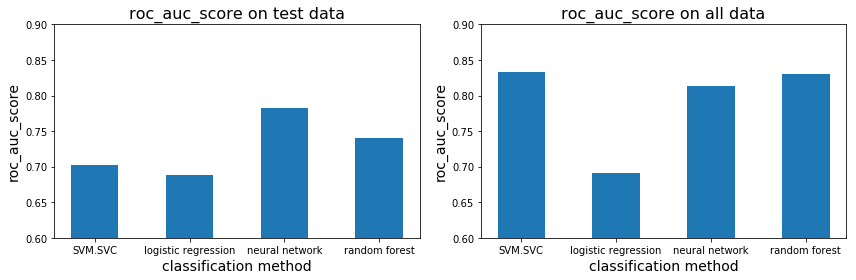

In [265]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].bar(roc_auc_test['classification method'], roc_auc_test['roc_auc_score_test_data'], width=0.5)
ax[0].set_ylim((0.6, 0.9))
ax[0].set_xlabel("classification method", fontsize=14, verticalalignment='top')
ax[0].set_ylabel("roc_auc_score", fontsize=14)
ax[0].set_title("roc_auc_score on test data", fontsize=16)
ax[1].bar(roc_auc_all['classification method'], roc_auc_all['roc_auc_score_all_data'], width=0.5)
ax[1].set_ylim((0.6, 0.9))
ax[1].set_xlabel("classification method", fontsize=14, verticalalignment='top')
ax[1].set_ylabel("roc_auc_score", fontsize=14)
ax[1].set_title("roc_auc_score on all data", fontsize=16)
plt.tight_layout()
plt.savefig("bank_deposit_roc_auc_unbalance_trainig_data.png", dpi=300)

### The neural network work data have the best roc_auc_score on the test data. Neural network, SVM and random forest models' roc_auc_scores on all data are close (SMV and random forest are slight better). 
### The SMC.SVC and random forest models perfomed well on all data, not so much on the test data, suggesting these models overfit the data. 